<a href="https://colab.research.google.com/github/KumarSumeeth/samsung/blob/main/SIC_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name:Sumeeth kumar
## USN:1AJ22CS160
## College name : Cambridge institute of Technology,North campus
## EmailId:sumeethkumar318@gmail.com
## Project:Tool wear prediction from cutting speed, feed rate, and operating time


#**Tool wear prediction from cutting speed, feed rate, and operating time**


In [92]:
datalink = '/content/sample_data/tool_wear.csv'

# Analyzing the Data

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv(datalink)

In [95]:
df.head()

,cutting_speed_mmin,feed_rate_mmrev,operating_time_hours,tool_material,workpiece_material,coolant_type,lubrication,machine_rigidity,vibration_level,tool_coating,tool_geometry,tool_wear_mm
0,NaN,0.166282,61.040980,Ceramic,Titanium,Oil,Flood,Low,Low,TiAlN,NaN,1.059755
1,92.024840,0.162791,525.583879,NaN,Titanium,NaN,Dry,NaN,Low,TiN,Worn,0.746735
2,232.024748,NaN,371.584209,Diamond,Titanium,Synthetic,Dry,Medium,High,TiAlN,Standard,1.580746
3,96.077143,NaN,661.867611,Ceramic,Aluminum,Water,Dry,NaN,Low,TiN,Sharp,2.090664
4,63.417885,0.451278,83.328342,Ceramic,Titanium,Synthetic,Flood,Medium,High,NaN,Sharp,NaN


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cutting_speed_mmin    952 non-null    float64
 1   feed_rate_mmrev       947 non-null    float64
 2   operating_time_hours  952 non-null    float64
 3   tool_material         953 non-null    object 
 4   workpiece_material    941 non-null    object 
 5   coolant_type          747 non-null    object 
 6   lubrication           950 non-null    object 
 7   machine_rigidity      954 non-null    object 
 8   vibration_level       940 non-null    object 
 9   tool_coating          695 non-null    object 
 10  tool_geometry         955 non-null    object 
 11  tool_wear_mm          947 non-null    float64
dtypes: float64(4), object(8)
memory usage: 93.9+ KB


In [97]:
df.describe()

,cutting_speed_mmin,feed_rate_mmrev,operating_time_hours,tool_wear_mm
count,952.000000,947.000000,952.000000,947.000000
mean,139.689655,0.259594,398.571190,1.568278
std,63.040697,0.138334,230.791958,0.847263
min,30.033262,0.020062,6.103652,0.051309
25%,85.806711,0.140622,188.245506,0.811396
50%,137.812147,0.264638,408.009447,1.581269
75%,196.643970,0.376469,592.895659,2.300982
max,249.959948,0.499861,798.628813,2.999582


#Finding Missing values and Data Imputation

In [98]:
df.isnull().sum() #missing values per column

,0
cutting_speed_mmin,48
feed_rate_mmrev,53
operating_time_hours,48
tool_material,47
workpiece_material,59
coolant_type,253
lubrication,50
machine_rigidity,46
vibration_level,60
tool_coating,305


<Axes: ylabel='None'>

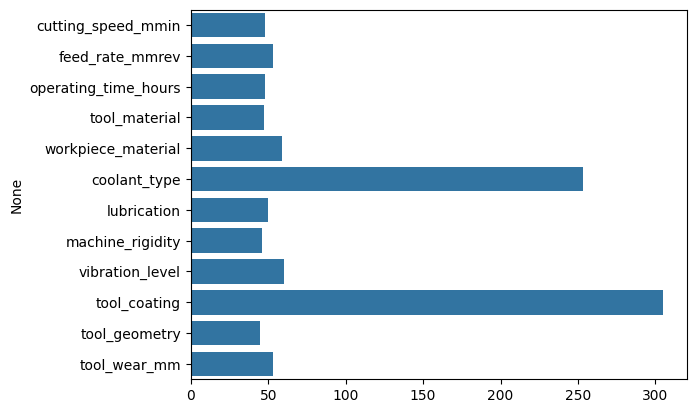

In [99]:
sns.barplot(x=df.isnull().sum().values, y=df.isnull().sum().index)

In [100]:
df.info() #non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cutting_speed_mmin    952 non-null    float64
 1   feed_rate_mmrev       947 non-null    float64
 2   operating_time_hours  952 non-null    float64
 3   tool_material         953 non-null    object 
 4   workpiece_material    941 non-null    object 
 5   coolant_type          747 non-null    object 
 6   lubrication           950 non-null    object 
 7   machine_rigidity      954 non-null    object 
 8   vibration_level       940 non-null    object 
 9   tool_coating          695 non-null    object 
 10  tool_geometry         955 non-null    object 
 11  tool_wear_mm          947 non-null    float64
dtypes: float64(4), object(8)
memory usage: 93.9+ KB


#data imputation

In [101]:
df['cutting_speed_mmin'].fillna(df['cutting_speed_mmin'].mean(), inplace=True)

/tmp/ipython-input-2315603795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cutting_speed_mmin'].fillna(df['cutting_speed_mmin'].mean(), inplace=True)


In [102]:
df['feed_rate_mmrev'].fillna(df['feed_rate_mmrev'].median(), inplace=True)

/tmp/ipython-input-139078058.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['feed_rate_mmrev'].fillna(df['feed_rate_mmrev'].median(), inplace=True)


In [103]:
#df['tool_material'].fillna(df['tool_material'].mode()[0], inplace=True)

In [104]:
df['operating_time_hours'].fillna(df['operating_time_hours'].mode()[0], inplace=True)

/tmp/ipython-input-724843141.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['operating_time_hours'].fillna(df['operating_time_hours'].mode()[0], inplace=True)


In [105]:
df['tool_wear_mm'].fillna(df['tool_wear_mm'].mode()[0], inplace=True)

/tmp/ipython-input-1447528890.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tool_wear_mm'].fillna(df['tool_wear_mm'].mode()[0], inplace=True)


In [106]:
from sklearn.impute import SimpleImputer
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [107]:
df.isnull().sum()

,0
cutting_speed_mmin,0
feed_rate_mmrev,0
operating_time_hours,0
tool_material,0
workpiece_material,0
coolant_type,0
lubrication,0
machine_rigidity,0
vibration_level,0
tool_coating,0


In [108]:
df.head()

,cutting_speed_mmin,feed_rate_mmrev,operating_time_hours,tool_material,workpiece_material,coolant_type,lubrication,machine_rigidity,vibration_level,tool_coating,tool_geometry,tool_wear_mm
0,139.689655,0.166282,61.040980,Ceramic,Titanium,Oil,Flood,Low,Low,TiAlN,Standard,1.059755
1,92.024840,0.162791,525.583879,Carbide,Titanium,Oil,Dry,Medium,Low,TiN,Worn,0.746735
2,232.024748,0.264638,371.584209,Diamond,Titanium,Synthetic,Dry,Medium,High,TiAlN,Standard,1.580746
3,96.077143,0.264638,661.867611,Ceramic,Aluminum,Water,Dry,Medium,Low,TiN,Sharp,2.090664
4,63.417885,0.451278,83.328342,Ceramic,Titanium,Synthetic,Flood,Medium,High,TiAlN,Sharp,0.051309


In [109]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1h6jqCXxznX80aCxVMr91kiKu3TtlLiUT5Y5741fcM0g/edit#gid=0


In [110]:
df.to_csv('tool_wear.csv')

In [111]:
df=pd.read_csv('tool_wear.csv')

#EDA AND DATA VISULIZATION

# ***`[New Section](https://)`***

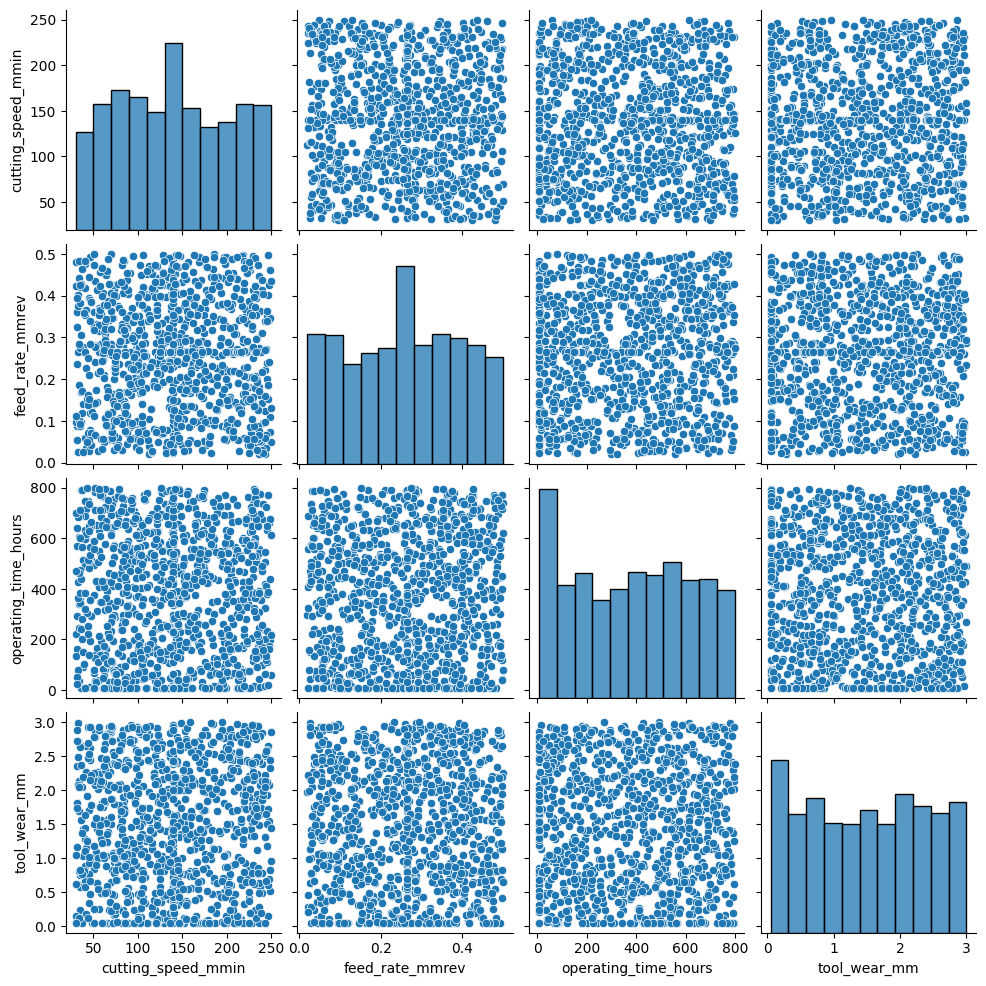

In [112]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'Unnamed: 0' in numerical_cols:
    numerical_cols.remove('Unnamed: 0')

sns.pairplot(df[numerical_cols])
plt.show()



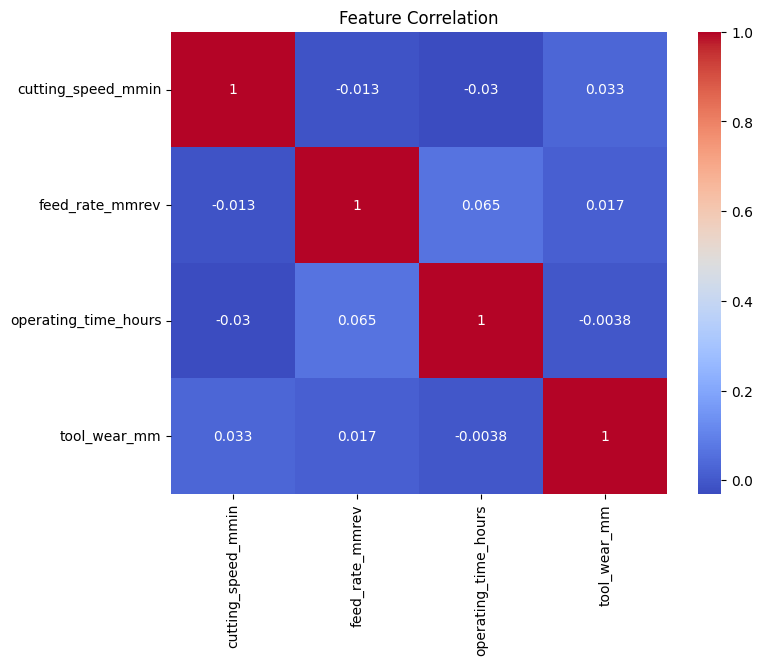

In [113]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

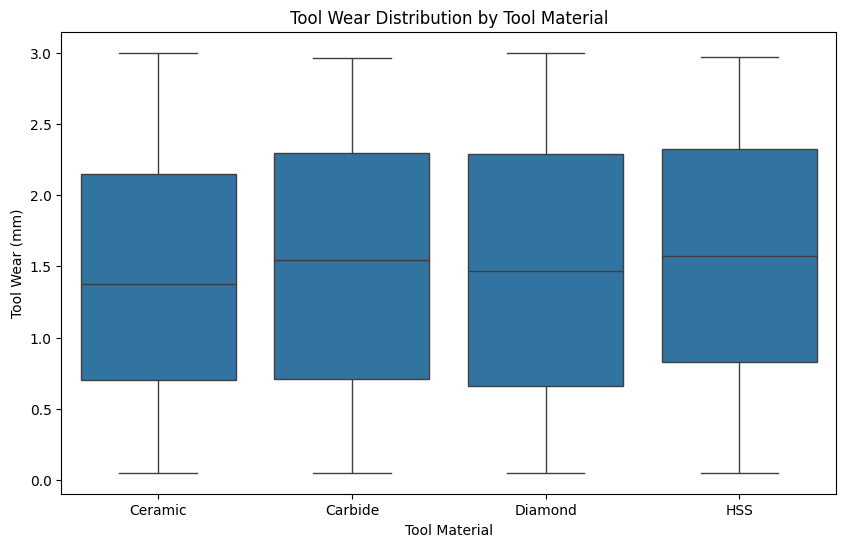

In [114]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tool_material', y='tool_wear_mm', data=df)
plt.title('Tool Wear Distribution by Tool Material')
plt.xlabel('Tool Material')
plt.ylabel('Tool Wear (mm)')
plt.show()

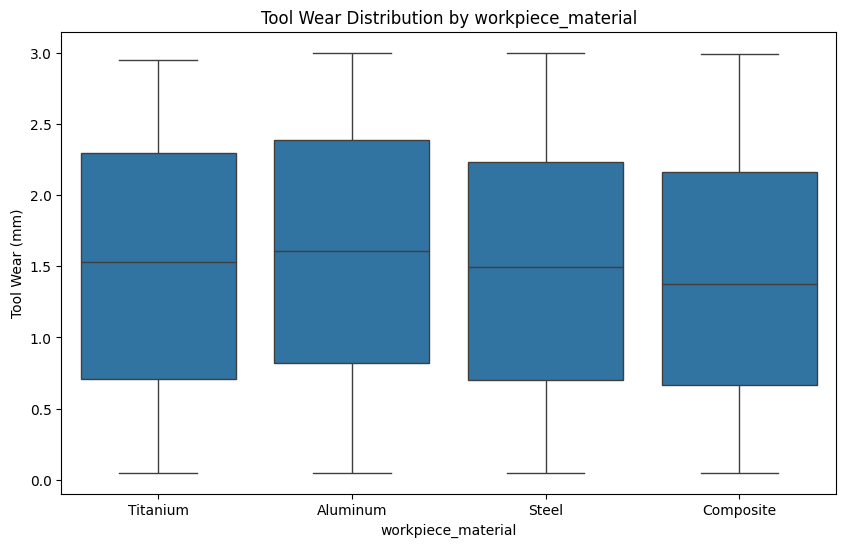

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='workpiece_material', y='tool_wear_mm', data=df)
plt.title('Tool Wear Distribution by workpiece_material')
plt.xlabel('workpiece_material')
plt.ylabel('Tool Wear (mm)')
plt.show()

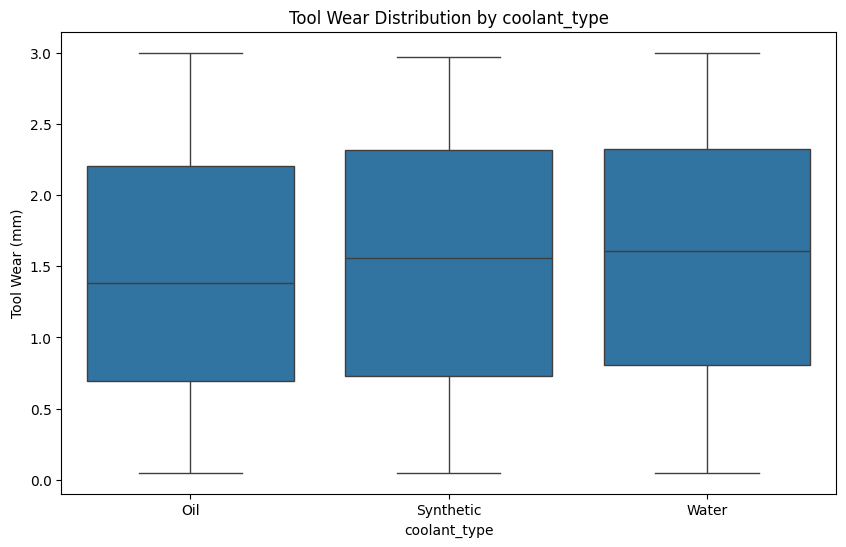

In [116]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='coolant_type', y='tool_wear_mm', data=df)
plt.title('Tool Wear Distribution by coolant_type')
plt.xlabel('coolant_type')
plt.ylabel('Tool Wear (mm)')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


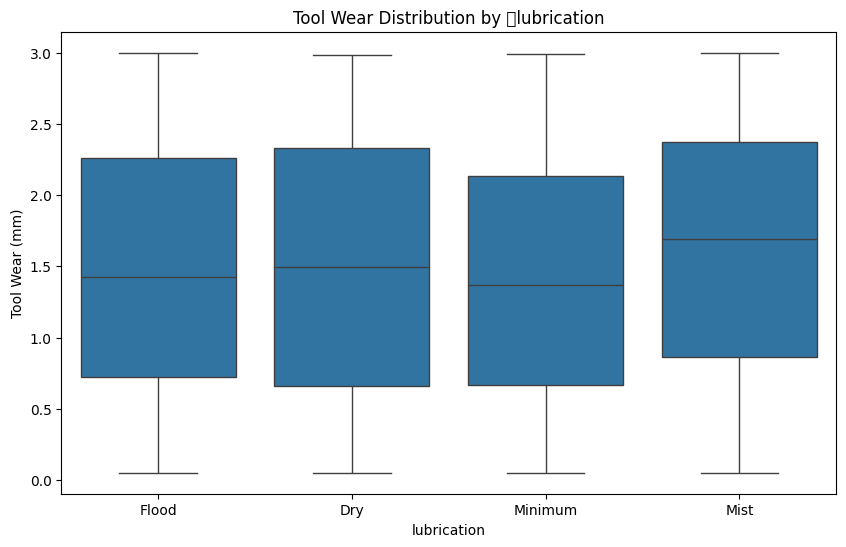

In [117]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='lubrication', y='tool_wear_mm', data=df)
plt.title('Tool Wear Distribution by 	lubrication')
plt.xlabel('lubrication')
plt.ylabel('Tool Wear (mm)')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


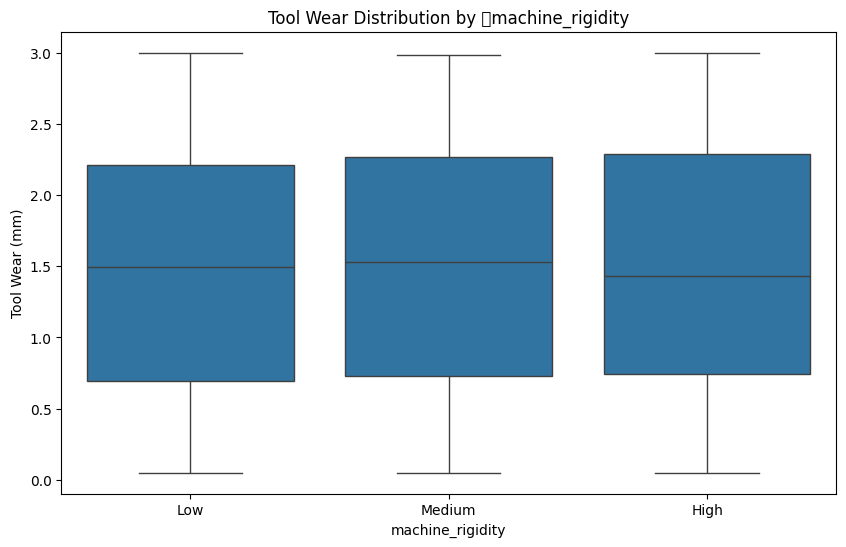

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='machine_rigidity', y='tool_wear_mm', data=df)
plt.title('Tool Wear Distribution by 	machine_rigidity')
plt.xlabel('machine_rigidity')
plt.ylabel('Tool Wear (mm)')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


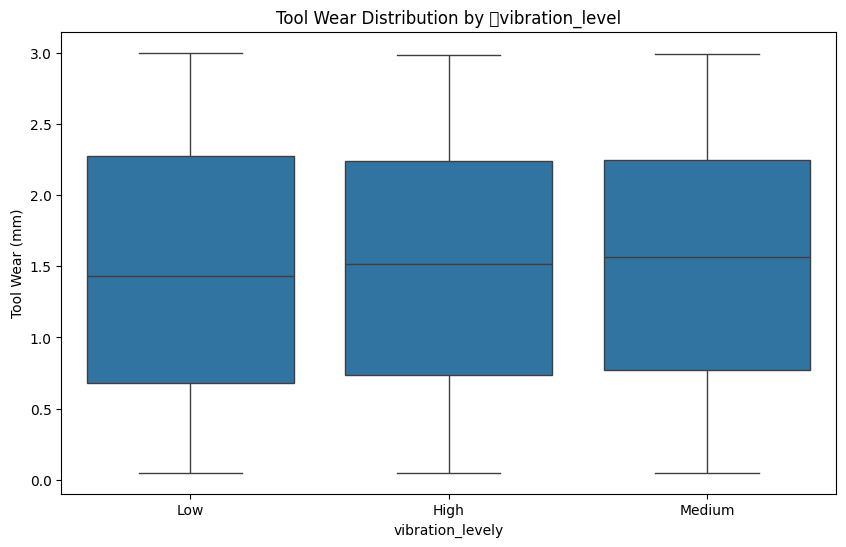

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='vibration_level', y='tool_wear_mm', data=df)
plt.title('Tool Wear Distribution by 	vibration_level')
plt.xlabel('vibration_levely')
plt.ylabel('Tool Wear (mm)')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


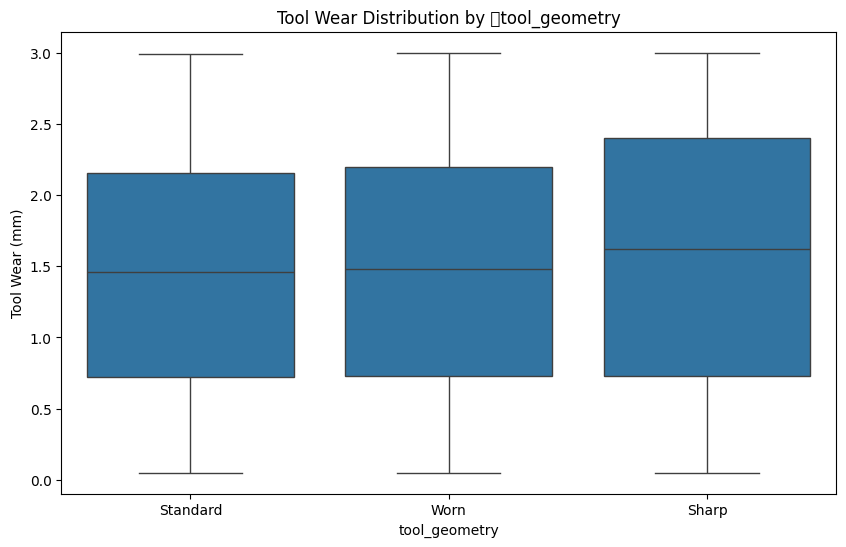

In [120]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tool_geometry', y='tool_wear_mm', data=df)
plt.title('Tool Wear Distribution by 	tool_geometry')
plt.xlabel('tool_geometry')
plt.ylabel('Tool Wear (mm)')
plt.show()

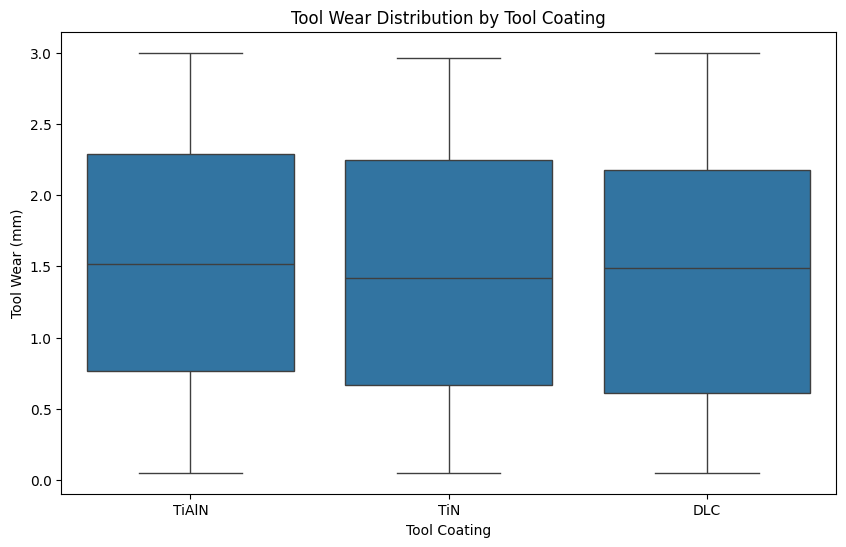

In [121]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tool_coating', y='tool_wear_mm', data=df)
plt.title('Tool Wear Distribution by Tool Coating')
plt.xlabel('Tool Coating')
plt.ylabel('Tool Wear (mm)')
plt.show()

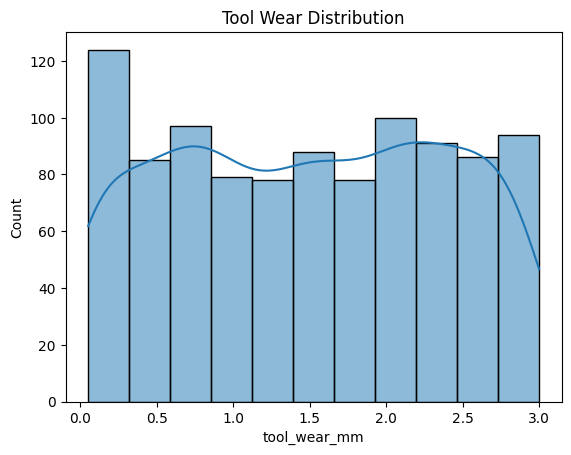

In [122]:
# Tool wear distribution
sns.histplot(df["tool_wear_mm"], kde=True) # Corrected column name
plt.title("Tool Wear Distribution")
plt.show()

#Regression

In [123]:
df=pd.read_csv('tool_wear.csv')

In [124]:
df.columns

Index(['Unnamed: 0', 'cutting_speed_mmin', 'feed_rate_mmrev',
       'operating_time_hours', 'tool_material', 'workpiece_material',
       'coolant_type', 'lubrication', 'machine_rigidity', 'vibration_level',
       'tool_coating', 'tool_geometry', 'tool_wear_mm'],
      dtype='object')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1000 non-null   int64  
 1   cutting_speed_mmin    1000 non-null   float64
 2   feed_rate_mmrev       1000 non-null   float64
 3   operating_time_hours  1000 non-null   float64
 4   tool_material         1000 non-null   object 
 5   workpiece_material    1000 non-null   object 
 6   coolant_type          1000 non-null   object 
 7   lubrication           1000 non-null   object 
 8   machine_rigidity      1000 non-null   object 
 9   vibration_level       1000 non-null   object 
 10  tool_coating          1000 non-null   object 
 11  tool_geometry         1000 non-null   object 
 12  tool_wear_mm          1000 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [126]:
df.head()

,Unnamed: 0,cutting_speed_mmin,feed_rate_mmrev,operating_time_hours,tool_material,workpiece_material,coolant_type,lubrication,machine_rigidity,vibration_level,tool_coating,tool_geometry,tool_wear_mm
0,0,139.689655,0.166282,61.040980,Ceramic,Titanium,Oil,Flood,Low,Low,TiAlN,Standard,1.059755
1,1,92.024840,0.162791,525.583879,Carbide,Titanium,Oil,Dry,Medium,Low,TiN,Worn,0.746735
2,2,232.024748,0.264638,371.584209,Diamond,Titanium,Synthetic,Dry,Medium,High,TiAlN,Standard,1.580746
3,3,96.077143,0.264638,661.867611,Ceramic,Aluminum,Water,Dry,Medium,Low,TiN,Sharp,2.090664
4,4,63.417885,0.451278,83.328342,Ceramic,Titanium,Synthetic,Flood,Medium,High,TiAlN,Sharp,0.051309


In [127]:
df['machine_rigidity'].value_counts()

,count
machine_rigidity,
Medium,381
Low,325
High,294


In [128]:
df['vibration_level'].value_counts()

,count
vibration_level,
Low,392
High,304
Medium,304


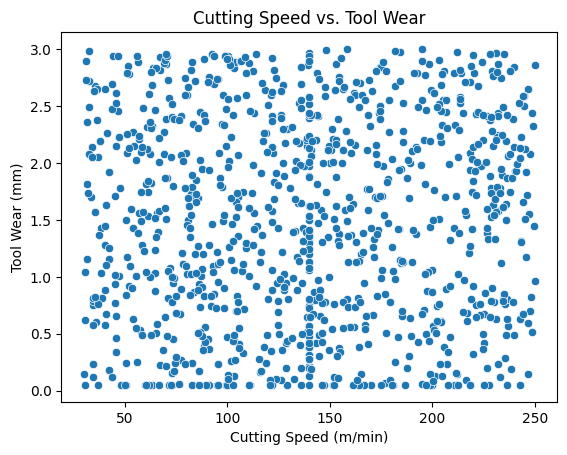

In [129]:
sns.scatterplot(data=df, x='cutting_speed_mmin', y='tool_wear_mm')
plt.title('Cutting Speed vs. Tool Wear')
plt.xlabel('Cutting Speed (m/min)')
plt.ylabel('Tool Wear (mm)')
plt.show()

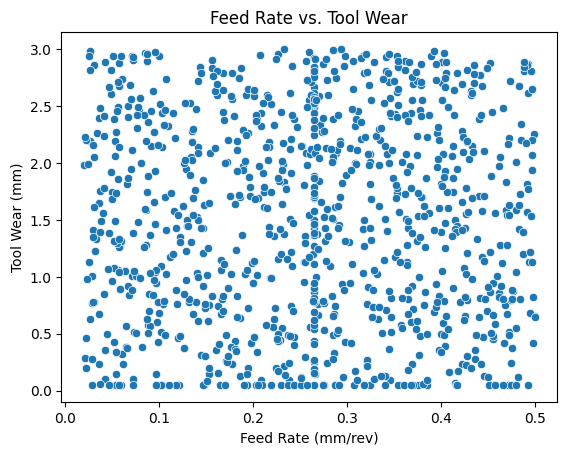

In [130]:
sns.scatterplot(data=df, x='feed_rate_mmrev', y='tool_wear_mm')
plt.title('Feed Rate vs. Tool Wear')
plt.xlabel('Feed Rate (mm/rev)')
plt.ylabel('Tool Wear (mm)')
plt.show()

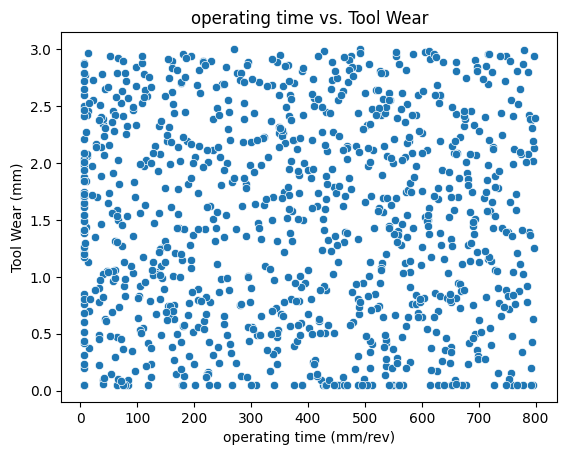

In [131]:
sns.scatterplot(data=df, x='operating_time_hours', y='tool_wear_mm')
plt.title('operating time vs. Tool Wear')
plt.xlabel('operating time (mm/rev)')
plt.ylabel('Tool Wear (mm)')
plt.show()

In [132]:
import statsmodels.api as sm

In [133]:
X = df[['cutting_speed_mmin','feed_rate_mmrev','operating_time_hours']]
Y = df['tool_wear_mm']


In [134]:
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

In [135]:
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:           tool_wear_mm   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4643
Date:                Mon, 16 Feb 2026   Prob (F-statistic):              0.707
Time:                        04:05:23   Log-Likelihood:                -1303.3
No. Observations:                1000   AIC:                             2615.
Df Residuals:                     996   BIC:                             2634.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.3963 

In [136]:
df2=pd.get_dummies(df)

In [137]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    1000 non-null   int64  
 1   cutting_speed_mmin            1000 non-null   float64
 2   feed_rate_mmrev               1000 non-null   float64
 3   operating_time_hours          1000 non-null   float64
 4   tool_wear_mm                  1000 non-null   float64
 5   tool_material_Carbide         1000 non-null   bool   
 6   tool_material_Ceramic         1000 non-null   bool   
 7   tool_material_Diamond         1000 non-null   bool   
 8   tool_material_HSS             1000 non-null   bool   
 9   workpiece_material_Aluminum   1000 non-null   bool   
 10  workpiece_material_Composite  1000 non-null   bool   
 11  workpiece_material_Steel      1000 non-null   bool   
 12  workpiece_material_Titanium   1000 non-null   bool   
 13  cool

In [138]:
for Feature in df2.columns:
  df2[Feature]=df2[Feature].astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    1000 non-null   float64
 1   cutting_speed_mmin            1000 non-null   float64
 2   feed_rate_mmrev               1000 non-null   float64
 3   operating_time_hours          1000 non-null   float64
 4   tool_wear_mm                  1000 non-null   float64
 5   tool_material_Carbide         1000 non-null   float64
 6   tool_material_Ceramic         1000 non-null   float64
 7   tool_material_Diamond         1000 non-null   float64
 8   tool_material_HSS             1000 non-null   float64
 9   workpiece_material_Aluminum   1000 non-null   float64
 10  workpiece_material_Composite  1000 non-null   float64
 11  workpiece_material_Steel      1000 non-null   float64
 12  workpiece_material_Titanium   1000 non-null   float64
 13  cool

In [139]:
x = df[['cutting_speed_mmin','feed_rate_mmrev','operating_time_hours']]
y = df['tool_wear_mm']
x = sm.add_constant(x)

# Combine X and Y, drop rows with any NaN values
combined_data_robust = pd.concat([x, y], axis=1)
cleaned_data_robust = combined_data_robust.dropna()

# Separate X_clean and Y_clean for robust model
x_clean_robust = cleaned_data_robust.drop(columns=['tool_wear_mm'])
y_clean_robust = cleaned_data_robust['tool_wear_mm']

# Re-running the OLS model with robust standard errors (HC1 type)
model_robust = sm.OLS(y_clean_robust, x_clean_robust).fit(cov_type='HC1')

print("OLS Regression Results with Robust Standard Errors (HC1):")
print(model_robust.summary())

OLS Regression Results with Robust Standard Errors (HC1):
                            OLS Regression Results                            
Dep. Variable:           tool_wear_mm   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4710
Date:                Mon, 16 Feb 2026   Prob (F-statistic):              0.703
Time:                        04:05:23   Log-Likelihood:                -1303.3
No. Observations:                1000   AIC:                             2615.
Df Residuals:                     996   BIC:                             2634.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

#classification


Logistic Regression



In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [141]:
#CALCULATE QUARTILES
Q1 = df['tool_wear_mm'].quantile(0.25)
Q2 = df['tool_wear_mm'].quantile(0.50)
Q3 = df['tool_wear_mm'].quantile(0.75)
print("Quartile Values:")
print("Q1 (25%) =", Q1)
print("Q2 (50%) =", Q2)
print("Q3 (75%) =", Q3)

Quartile Values:
Q1 (25%) = 0.7267853408366776
Q2 (50%) = 1.4976871050114764
Q3 (75%) = 2.2551086658728945


In [142]:
# CREATE LABELS USING QUARTILES
def label_tool_wear(value):
    if value <= Q1:
        return "Low"
    elif value <= Q2:
        return "Medium"
    else:
        return "High"

In [143]:

df['tool_wear_label'] = df['tool_wear_mm'].apply(label_tool_wear)

print("\nLabel Distribution:")
print(df['tool_wear_label'].value_counts())


Label Distribution:
tool_wear_label
High      500
Medium    250
Low       250
Name: count, dtype: int64


In [144]:
# CONVERT TO LOW / MEDIUM / HIGH
df['tool_wear_label'] = pd.qcut(
    df['tool_wear_mm'],
    q=3,
    labels=["Low", "Medium", "High"]
)

In [145]:

# ENCODE LABELS

le = LabelEncoder()
df['tool_wear_encoded'] = le.fit_transform(df['tool_wear_label'])

In [146]:

print("Label Mapping:")
for i, label in enumerate(le.classes_):
    print(i, "->", label)

Label Mapping:
0 -> High
1 -> Low
2 -> Medium


In [147]:
# Features & target
X = df[['cutting_speed_mmin', 'feed_rate_mmrev', 'operating_time_hours']]

In [148]:
# Encode the categorical target variable
y = le.fit_transform(df['tool_wear_label'])

In [149]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [150]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [151]:
# LOGISTIC REGRESSION MODEL
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000
)

# Combine X_train and y_train into a temporary DataFrame to easily drop NaNs
# This ensures X_train and y_train remain aligned after dropping rows.
X_train_df = pd.DataFrame(X_train)
y_train_series = pd.Series(y_train)

combined_train_data = pd.concat([X_train_df, y_train_series], axis=1)
combined_train_data_cleaned = combined_train_data.dropna()

# Separate back into cleaned X_train and y_train
X_train_cleaned = combined_train_data_cleaned.iloc[:, :-1].values # All columns except the last one
y_train_cleaned = combined_train_data_cleaned.iloc[:, -1].values  # The last column

model.fit(X_train_cleaned, y_train_cleaned)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [152]:
# Prediction
# Convert X_test back to DataFrame for easier NaN handling
X_test_df = pd.DataFrame(X_test)
y_test_series = pd.Series(y_test)

# Combine X_test and y_test to drop rows with any NaN values consistently
combined_test_data = pd.concat([X_test_df, y_test_series], axis=1)
combined_test_data_cleaned = combined_test_data.dropna()

# Separate back into cleaned X_test and y_test
X_test_cleaned = combined_test_data_cleaned.iloc[:, :-1].values
y_test_cleaned = combined_test_data_cleaned.iloc[:, -1].values

y_pred = model.predict(X_test_cleaned)

# Update y_test to the cleaned version for subsequent evaluation
y_test = y_test_cleaned

In [153]:
# EVALUATION
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")

# Filter out nan from le.classes_ before passing to classification_report
# And create a corresponding list of integer labels
filtered_target_names = []
labels_to_report = []
for i, name in enumerate(le.classes_):
    if pd.notna(name):
        filtered_target_names.append(name)
        labels_to_report.append(i)

print(classification_report(
    y_test,
    y_pred,
    labels=labels_to_report, # Explicitly specify labels to match target_names
    target_names=filtered_target_names
))

Accuracy: 0.325

Classification Report:
              precision    recall  f1-score   support

        High       0.31      0.31      0.31        67
         Low       0.34      0.30      0.32        67
      Medium       0.32      0.36      0.34        66

    accuracy                           0.33       200
   macro avg       0.33      0.33      0.32       200
weighted avg       0.33      0.33      0.32       200



In [154]:
# ACCURACY OUTPUT
accuracy = accuracy_score(y_test, y_pred)

In [155]:
print("\n==============================")
print("Model Accuracy:", round(accuracy * 100, 2), "%")
print("==============================")

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred,
    labels=labels_to_report, # Reuse labels from previous cell
    target_names=filtered_target_names # Reuse filtered target names from previous cell
))


Model Accuracy: 32.5 %

Classification Report:
              precision    recall  f1-score   support

        High       0.31      0.31      0.31        67
         Low       0.34      0.30      0.32        67
      Medium       0.32      0.36      0.34        66

    accuracy                           0.33       200
   macro avg       0.33      0.33      0.32       200
weighted avg       0.33      0.33      0.32       200



In [156]:
# TEST NEW DATA
new_data = [[250, 0.3, 120]]  # speed, feed, time

new_data_scaled = scaler.transform(new_data)

prediction = model.predict(new_data_scaled)

print("\nPredicted Tool Wear:",le.inverse_transform(prediction)[0])


Predicted Tool Wear: High


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ols

In [157]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [158]:
X = df[['cutting_speed_mmin', 'feed_rate_mmrev', 'operating_time_hours']]
y = df['tool_wear_mm']

In [159]:
# Add constant for intercept (β0)
X = sm.add_constant(X)

In [160]:
# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [161]:
combined_train_data_ols = pd.concat([X_train, y_train], axis=1)
cleaned_train_data_ols = combined_train_data_ols.dropna()

X_train_cleaned_ols = cleaned_train_data_ols.drop(columns=['tool_wear_mm'])
y_train_cleaned_ols = cleaned_train_data_ols['tool_wear_mm']

ols_model = sm.OLS(y_train_cleaned_ols, X_train_cleaned_ols).fit()

In [162]:
# MODEL SUMMARY
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:           tool_wear_mm   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.06875
Date:                Mon, 16 Feb 2026   Prob (F-statistic):              0.977
Time:                        04:05:23   Log-Likelihood:                -1048.2
No. Observations:                 800   AIC:                             2104.
Df Residuals:                     796   BIC:                             2123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.4489 

In [163]:
y_pred = ols_model.predict(X_test)

In [164]:
# EVALUATION
# Combine y_test and y_pred into a DataFrame to drop NaNs simultaneously
eval_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
eval_df_cleaned = eval_df.dropna()

rmse = np.sqrt(mean_squared_error(eval_df_cleaned['y_test'], eval_df_cleaned['y_pred']))
r2 = r2_score(eval_df_cleaned['y_test'], eval_df_cleaned['y_pred'])

In [165]:

print("\nRMSE:", rmse)
print("R² Score:", r2*100)
#Term	Meaning
#Coefficient	Impact of feature on tool wear
#p-value	Feature significance
#R²	Variance explained
#RMSE	Prediction error


RMSE: 0.867487094811483
R² Score: 0.0517605303826385


# Classification using Neural Network



ANN (Artificial Neural Network)-Multilayer Perceptron

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [167]:
!pip install tensorflow

In [168]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [169]:
df = pd.read_csv('tool_wear.csv')

# Encode target
le = LabelEncoder()
# Bin the continuous 'tool_wear_mm' into categories for classification
df['tool_wear_category_ann'] = pd.qcut(df['tool_wear_mm'], q=3, labels=['low', 'medium', 'high'])
df['tool_wear_encoded_ann'] = le.fit_transform(df['tool_wear_category_ann'])

In [170]:
# Features & target
X = df[['cutting_speed_mmin', 'feed_rate_mmrev', 'operating_time_hours']]
y = df['tool_wear_encoded_ann']

In [171]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [172]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [173]:
# ANN Model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [174]:
# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [175]:
# Train
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

In [176]:
# Predict
y_pred = np.argmax(model.predict(X_test), axis=1)

# Evaluation
print("ANN Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
ANN Accuracy: 0.305
              precision    recall  f1-score   support

           0       0.20      0.13      0.16        67
           1       0.36      0.55      0.43        67
           2       0.29      0.23      0.25        66

    accuracy                           0.30       200
   macro avg       0.28      0.30      0.28       200
weighted avg       0.28      0.30      0.28       200



#user interface


In [177]:
x.columns

Index(['const', 'cutting_speed_mmin', 'feed_rate_mmrev',
       'operating_time_hours'],
      dtype='object')

In [178]:
!pip install Gradio

In [179]:
import numpy as np
import pandas as pd
import gradio as gr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [180]:
# Replace filename if different
df = pd.read_csv('tool_wear.csv')

print("Dataset Preview:")
display(df.head())

Dataset Preview:


,Unnamed: 0,cutting_speed_mmin,feed_rate_mmrev,operating_time_hours,tool_material,workpiece_material,coolant_type,lubrication,machine_rigidity,vibration_level,tool_coating,tool_geometry,tool_wear_mm
0,0,139.689655,0.166282,61.040980,Ceramic,Titanium,Oil,Flood,Low,Low,TiAlN,Standard,1.059755
1,1,92.024840,0.162791,525.583879,Carbide,Titanium,Oil,Dry,Medium,Low,TiN,Worn,0.746735
2,2,232.024748,0.264638,371.584209,Diamond,Titanium,Synthetic,Dry,Medium,High,TiAlN,Standard,1.580746
3,3,96.077143,0.264638,661.867611,Ceramic,Aluminum,Water,Dry,Medium,Low,TiN,Sharp,2.090664
4,4,63.417885,0.451278,83.328342,Ceramic,Titanium,Synthetic,Flood,Medium,High,TiAlN,Sharp,0.051309


In [181]:
import gradio as gr
import numpy as np


# LOGIN DETAILS
USERNAME = "admin"
PASSWORD = "1234"



# LOGIN FUNCTION

def login(user, pwd):
    if user == USERNAME and pwd == PASSWORD:
        return True, "Login Successful"
    else:
        return False, "Invalid Username or Password"

# TOOL WEAR PREDICTION
# (Replace with your ML Model Later)

def predict_tool_wear(cutting_speed, feed_rate, operating_time):

    # Example calculation (Dummy Logic)
    wear_value = (cutting_speed * 0.5) + (feed_rate * 0.3) + (operating_time * 0.2)

    # Classification
    if wear_value < 50:
        wear_level = "LOW"
    elif wear_value < 100:
        wear_level = "MEDIUM"
    else:
        wear_level = "HIGH"

    return round(wear_value, 2), wear_level


def predict_tool_wear_ui(cutting_speed, feed_rate, operating_time):

    value, level = predict_tool_wear(
        cutting_speed,
        feed_rate,
        operating_time
    )

    return f"Wear Value: {value}", f"Wear Level: {level}"


# GRADIO APP

with gr.Blocks() as app:

    gr.Markdown("#  @ Sumeeth kumar🔧 Tool Wear Prediction System")

    login_state = gr.State(False)


    # LOGIN PAGE

    with gr.Column(visible=True) as login_page:

        gr.Markdown("## Login")

        username = gr.Textbox(label="Username")
        password = gr.Textbox(label="Password", type="password")

        login_btn = gr.Button("Login")
        login_msg = gr.Textbox(label="Status", interactive=False)


    # PREDICTION PAGE

    with gr.Column(visible=False) as predict_page:

        gr.Markdown("## 📊 Tool Wear Prediction")

        cutting_speed = gr.Number(label="Cutting Speed")
        feed_rate = gr.Number(label="Feed Rate")
        operating_time = gr.Number(label="Operating Time")

        predict_btn = gr.Button("Predict")

        wear_value_box = gr.Textbox(label="Tool Wear Value", interactive=False)
        wear_level_box = gr.Textbox(label="Tool Wear Level", interactive=False)


    # LOGIN HANDLER

    def handle_login(user, pwd):

        success, msg = login(user, pwd)

        if success:
            return (
                True,
                msg,
                gr.update(visible=False),
                gr.update(visible=True)
            )
        else:
            return (
                False,
                msg,
                gr.update(visible=True),
                gr.update(visible=False)
            )


    login_btn.click(
        handle_login,
        inputs=[username, password],
        outputs=[login_state, login_msg, login_page, predict_page]
    )



    # PREDICT HANDLER
    predict_btn.click(

        predict_tool_wear_ui,

        inputs=[
            cutting_speed,
            feed_rate,
            operating_time
        ],

        outputs=[
            wear_value_box,
            wear_level_box
        ]
    )


# Running APP

app.launch(share=True)



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fb0cac428664040e6c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Output of user interface

Login Page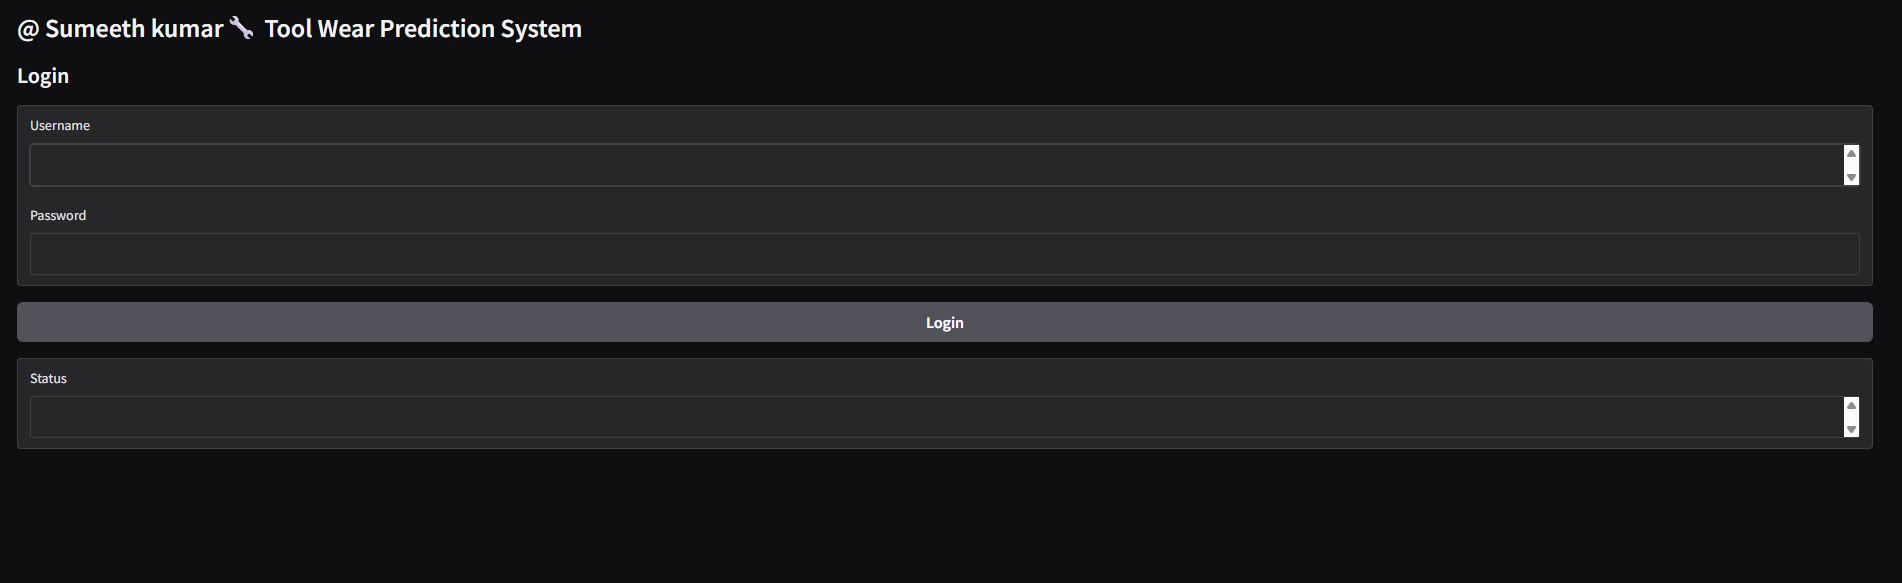

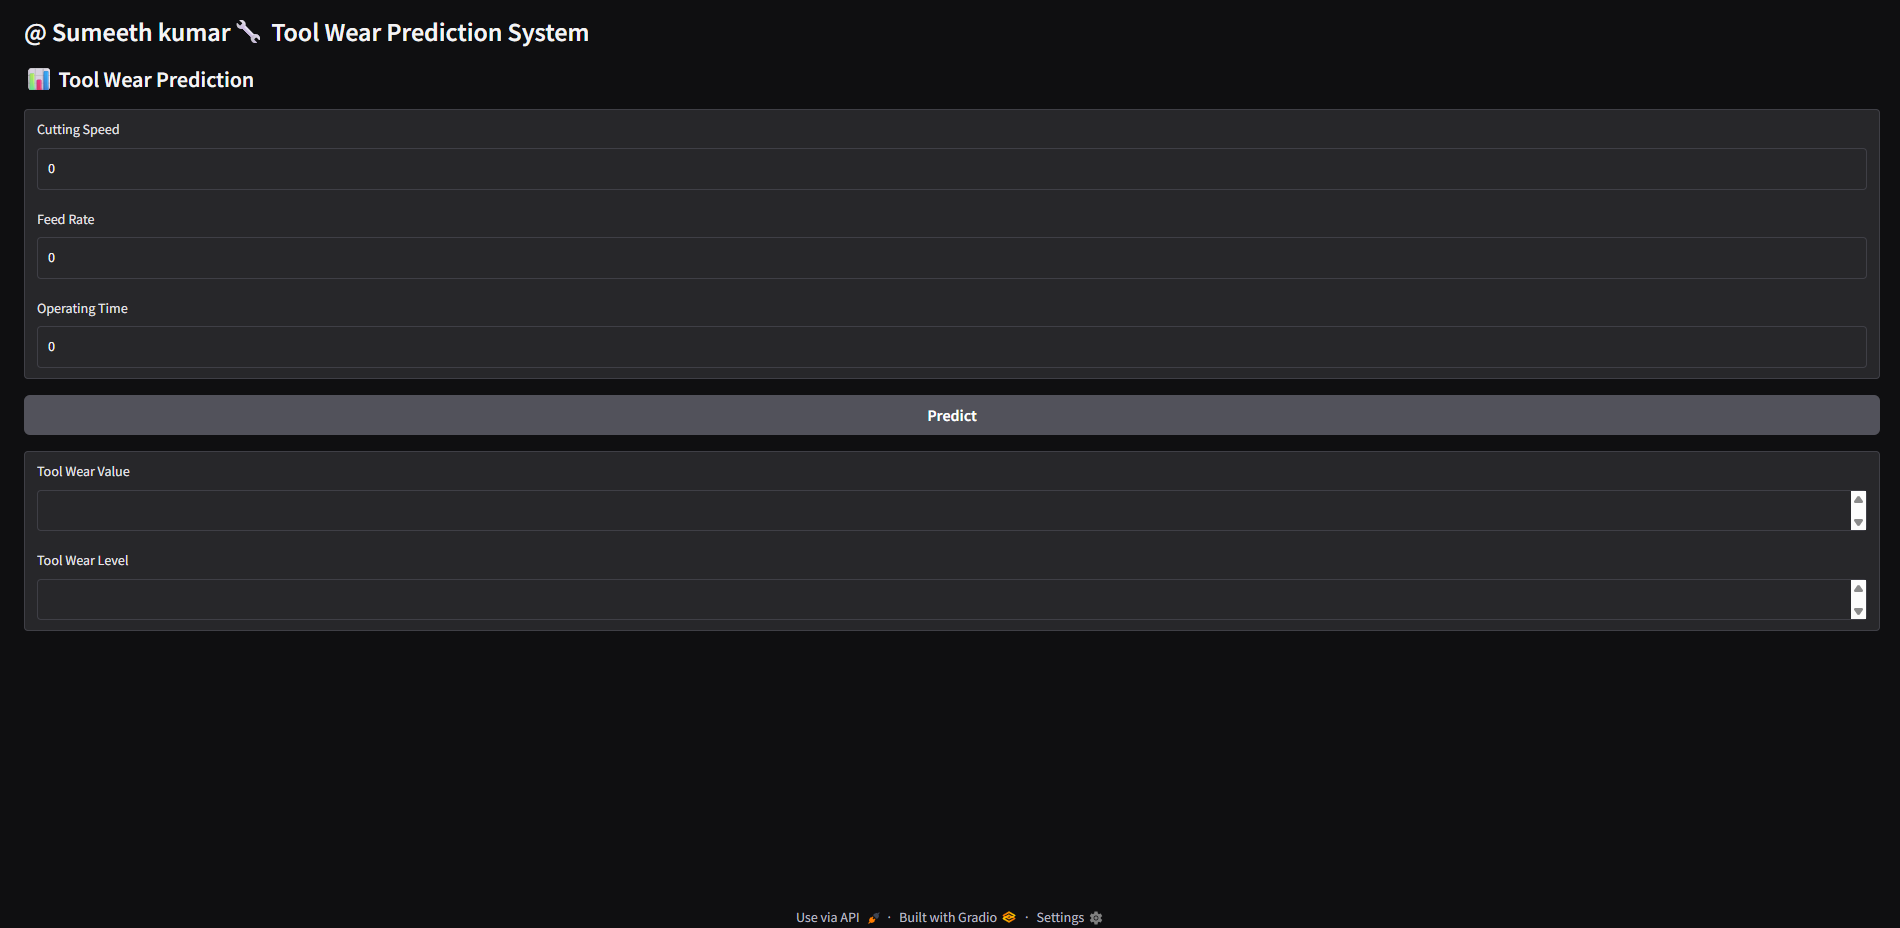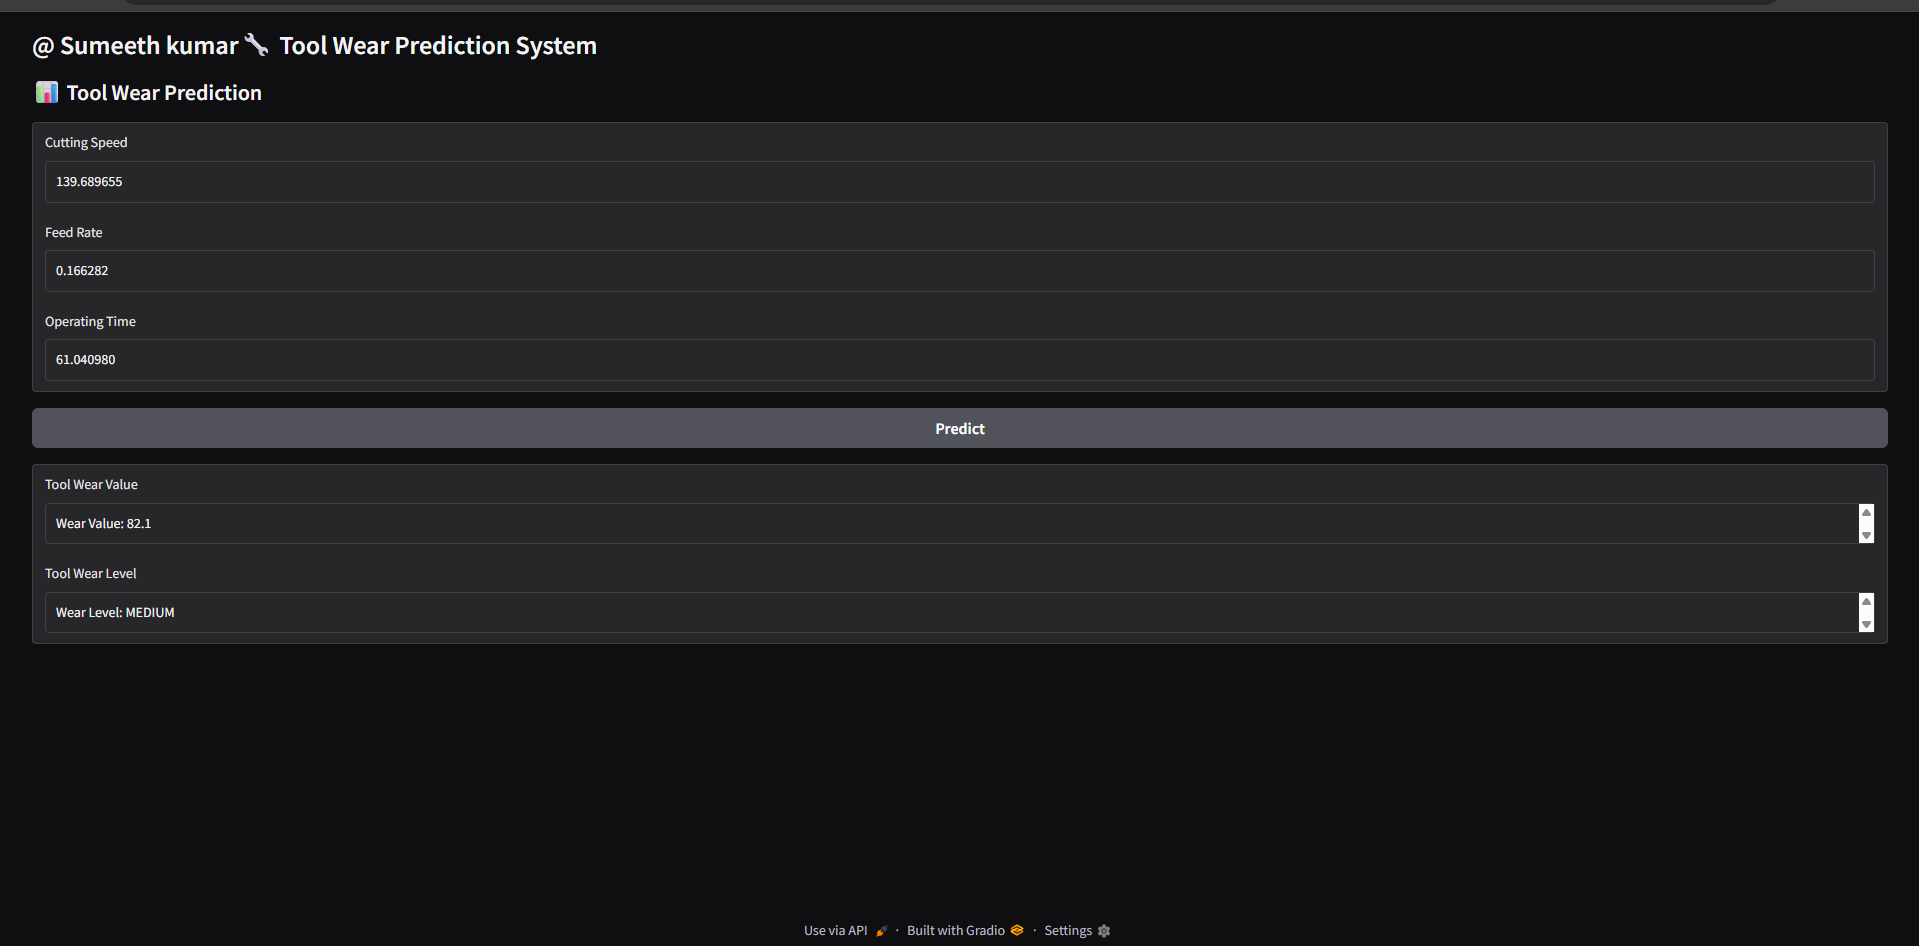